##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get Started with TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To run the Colab notebook:

1. Connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

For more examples and guides (including details for this program), see [Get Started with TensorFlow](https://www.tensorflow.org/get_started/).

Let's get started, import the TensorFlow library into your program:

In [2]:
# For the capability
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and prepare the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Convert the samples from integers to floating-point numbers:

(60000, 28, 28)


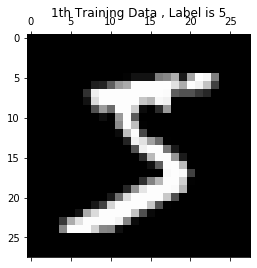

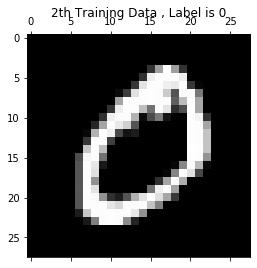

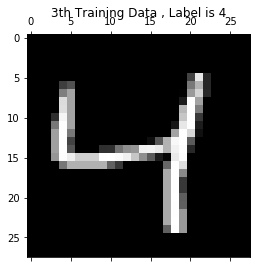

In [3]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
for i in [0, 1, 2]:
    curr_img = np.reshape(x_train[i, :], (28, 28))
    curr_label = y_train[i]
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " 
              + ", Label is " + str(curr_label))
    
x_train, x_test = x_train / 255.0, x_test / 255.0

![MNIST-Matrix](https://www.tensorflow.org/images/MNIST-Matrix.png)
![MNIST-image](https://www.tensorflow.org/images/mnist-train-xs.png)
![MNIST-label](https://www.tensorflow.org/images/mnist-train-ys.png)

Build the `tf.keras` model by stacking layers. Select an optimizer and loss function used for training:

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                             # Flattens the input.
  tf.keras.layers.Dense(128, activation=tf.nn.relu),                         # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
  tf.keras.layers.Dense(64, activation=tf.nn.relu),                                              # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#compile
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train and evaluate model:

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit
model.fit(x_train, y_train, epochs=5)     # Trains the model for a fixed number of epochs

# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#evaluate
model.evaluate(x_test, y_test)     # Returns the loss value & metrics values for the model in test mode.

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.6305 - acc: 0.8349
Epoch 2/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2928 - acc: 0.9161
Epoch 3/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2386 - acc: 0.9316
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2043 - acc: 0.9411
Epoch 5/5
10000/10000 [==============================] - 1s 128us/sample - loss: 0.1651 - acc: 0.9498


[0.16508958195969461, 0.9498]

You’ve now trained an image classifier with ~98% accuracy on this dataset. See [Get Started with TensorFlow](https://www.tensorflow.org/get_started/) to learn more.

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model
tf.keras.models.save_model( model, ".\model" )